# 트레이딩 전략 구현 

### 4.1 현대 포트폴리오 이론 

In [119]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from Investar import Analyzer
plt.rc('font', family='NanumGothic')
plt.rc('font', size=20)        # 기본 폰트 크기
plt.rc('axes', labelsize=10)   # x,y축 label 폰트 크기
plt.rc('xtick', labelsize=15)  # x축 눈금 폰트 크기 
plt.rc('ytick', labelsize=15)  # y축 눈금 폰트 크기
plt.rc('legend', fontsize=14)  # 범례 폰트 크기
plt.rc('figure', titlesize=50) # figure title 폰트 크기

In [139]:
# 삼성전자의 코로나 이후 주가 데이터 
mk = Analyzer.MarketDB()
stocks = ['삼성전자', 'SK하이닉스', '현대자동차', 'NAVER']

df = pd.DataFrame()
for s in stocks:
    df[s] = mk.get_daily_price(s, '2020-01-01', '2022-06-28')['close']

In [140]:
df

,삼성전자,SK하이닉스,현대자동차,NAVER
date,,,,
2020-01-02,55200,94700,118000,182500
2020-01-03,55500,94500,116000,181500
2020-01-06,55500,94300,116000,180500
2020-01-07,55800,94000,115500,187000
2020-01-08,56800,97400,112000,183000
...,...,...,...,...
2022-06-22,57600,92200,171500,229000
2022-06-23,57400,90200,171000,234000
2022-06-24,58400,91600,173000,247500


In [141]:
daily_ret = df.pct_change()            # 수익률 비교를 위한 일간 변동률
annual_ret = daily_ret.mean() * 252    # 연간 수익률 
daily_cov = daily_ret.cov()            # 일간 리스크: 일간 변동률의 공분산
annual_cov = daily_cov * 252           # 연간 리스크 

port_ret = [] 
port_risk = [] 
port_weights = [] 
    
# 몬테카를로 시뮬레이션: 매우 많은 난수를 이용해 함수의 값을 확률적으로 계산 하는 것 
 # 각 포트폴리오에 포함된 4종목의 비율을 모두 다르게 함.
for _ in range(20000): 
    weights = np.random.random(len(stocks))
    weights /= np.sum(weights) 

    returns = np.dot(weights, annual_ret) 
    risk = np.sqrt(np.dot(weights.T, np.dot(annual_cov, weights))) 

    port_ret.append(returns) 
    port_risk.append(risk) 
    port_weights.append(weights) 

portfolio = {'Returns': port_ret, 'Risk': port_risk} 
for i, s in enumerate(stocks): 
    portfolio[s] = [weight[i] for weight in port_weights] 
df = pd.DataFrame(portfolio) 
df = df[['Returns', 'Risk'] + [s for s in stocks]] 

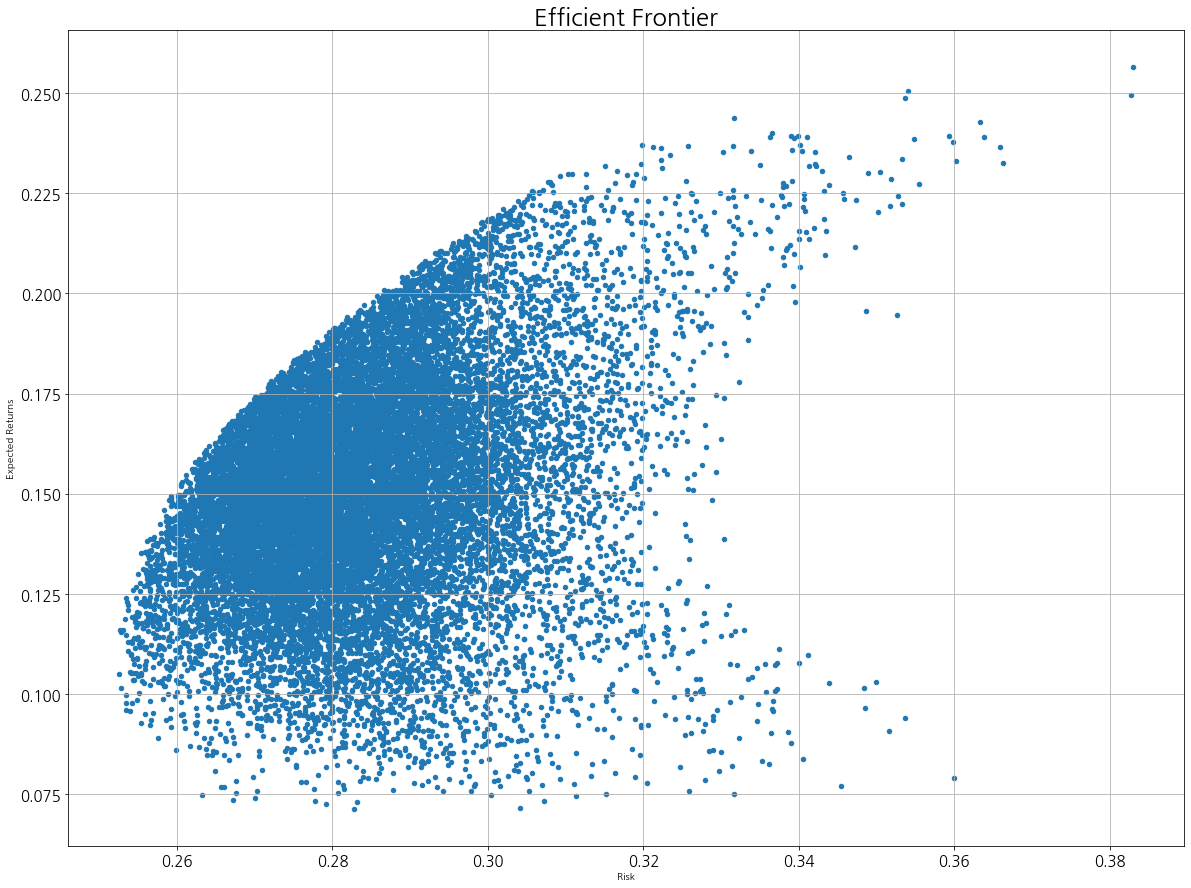

In [142]:
# 몬테카를로 시뮬레이션으로 생성한 효율적 투자선
df.plot.scatter(x='Risk', y='Returns', figsize=(20, 15), grid=True)
plt.rc('font', size=20)        # 기본 폰트 크기
plt.rc('axes', labelsize=10)   # x,y축 label 폰트 크기
plt.rc('xtick', labelsize=15)  # x축 눈금 폰트 크기 
plt.rc('ytick', labelsize=15)  # y축 눈금 폰트 크기
plt.rc('legend', fontsize=14)  # 범례 폰트 크기
plt.rc('figure', titlesize=50) # figure title 폰트 크기
plt.title('Efficient Frontier') 
plt.xlabel('Risk') 
plt.ylabel('Expected Returns') 
plt.show()  

## 4.2 샤프 지수와 포트폴리오 최적화 

$샤프지수 = {포트폴리오 예상 수익률 - 무위험률 \over 수익률의 표준편차} $

    현대 포트폴리오 이론에서는, 
    개별 리스크가 주어졌을 때 효율적 투자선보다 높은 수익률은 기대할 수 없다. 

    그렇다면, 리스크를 최소화하고 수익률을 최대화하는 포트폴리오는 어떻게 찾아낼 수 있을까? 이 답은 윌리엄 샤프의 '샤프 지수'에서 찾을 수 있다. 
    샤프지수는 측정된 위험 단위당 수익률을 계산한다는 점에서 수익률의 표준편차오 다른 점이 있다. 

    계산의 편의를 위해 무위험률은 0이라 가정한다. 샤프지수는 예상 수익률을 수익률의 표준편차로 나누어서 구했다. 

    예를들어 예상 수익률이 7%이고 수익률의 표준편차가 5%인 경우, 
    샤프 지수는 7 / 5 = 1.4가 된다. ( 샤프 지수가 높을수록 위험에 대한 보상이 크다.) 

AttributeError: 'AxesSubplot' object has no attribute 'rowNum'

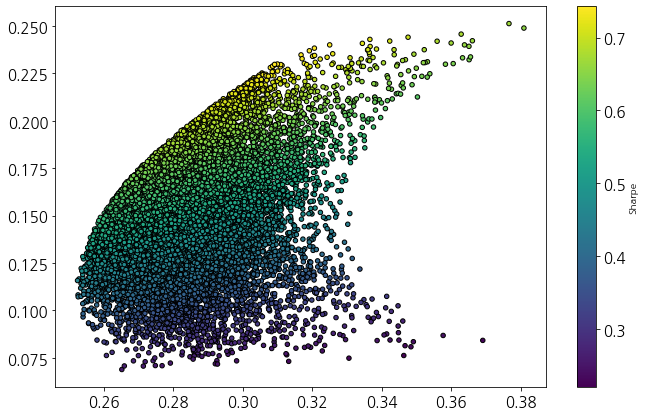

In [127]:
# 이전 코드에서 샤프지수 코드 추가 
mk = Analyzer.MarketDB()
stocks = ['삼성전자', 'SK하이닉스', '현대자동차', 'NAVER']
df = pd.DataFrame()
for s in stocks:
    df[s] = mk.get_daily_price(s,'2020-01-01', '2022-06-28')['close']

daily_ret = df.pct_change() 
annual_ret = daily_ret.mean() * 252
daily_cov = daily_ret.cov() 
annual_cov = daily_cov * 252

port_ret = [] 
port_risk = [] 
port_weights = []
sharpe_ratio = [] 

for _ in range(20000): 
    weights = np.random.random(len(stocks)) 
    weights /= np.sum(weights) 

    returns = np.dot(weights, annual_ret) 
    risk = np.sqrt(np.dot(weights.T, np.dot(annual_cov, weights))) 

    port_ret.append(returns) 
    port_risk.append(risk) 
    port_weights.append(weights)
    sharpe_ratio.append(returns/risk)  # ①

portfolio = {'Returns': port_ret, 'Risk': port_risk, 'Sharpe': sharpe_ratio}
for i, s in enumerate(stocks): 
    portfolio[s] = [weight[i] for weight in port_weights] 
df = pd.DataFrame(portfolio) 
df = df[['Returns', 'Risk', 'Sharpe'] + [s for s in stocks]]  # ② 

max_sharpe = df.loc[df['Sharpe'] == df['Sharpe'].max()]  # ③
min_risk = df.loc[df['Risk'] == df['Risk'].min()]  # ④

df.plot.scatter(x='Risk', y='Returns', c='Sharpe', cmap='viridis',
    edgecolors='k', figsize=(11,7), grid=True)  # ⑤
plt.scatter(x=max_sharpe['Risk'], y=max_sharpe['Returns'], c='r', 
    marker='*', s=300)  # ⑥
plt.scatter(x=min_risk['Risk'], y=min_risk['Returns'], c='r', 
    marker='X', s=200)  # ⑦
plt.title('Portfolio Optimization') 
plt.xlabel('Risk') 
plt.ylabel('Expected Returns') 
#plt.show()
plt.savefig('포트폴리오 최적화')

## 4.3 볼린저 밴드 지표 

_볼린저 밴드_ <br>
주가의 변동이 표준 정규분포를 따른다는 가정에서 주가의 위아래에 밴드를 표시함으로써 주가의 상대적인 높낮이를 알려준다. (기술적 분석 선호하는 투자자 주로 사용) 

- 주가의 20일 이동 평균선을 기준으로, 상대적인 고점을 나타내는 상단 밴드와 상대적인 저점을 나타내는 하단 밴드로 구성 ( 상단 밴드 근처: 상대적 고점, 하단 밴드 근처: 상대적 저점) 
- 상단 밴드와 하단 밴드의 사이 폭은 주가의 표준편차와 특정 상수의 곱을 나타냄.(폭이 좁을수록 변동성 작음)

표준 볼린저 밴드 공식 <br>
중심선 : 20일 이동평균선 <br>
상단선 : 20일 이동평균선 + 표준편차x2 <br>
하단선 : 20일 이동평균선 - 표준편차x2

#### 네이버 볼린저 밴드 

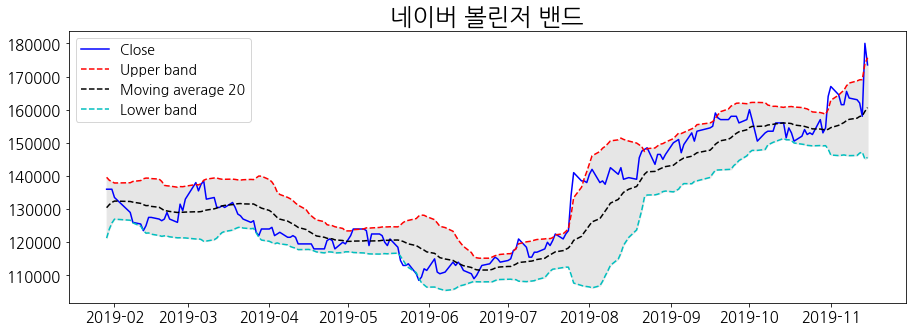

In [128]:
mk = Analyzer.MarketDB()
df = mk.get_daily_price('NAVER', '2019-01-02', '2019-11-15')
  
df['MA20'] = df['close'].rolling(window=20).mean()  # ①
df['stddev'] = df['close'].rolling(window=20).std() # ②
df['upper'] = df['MA20'] + (df['stddev'] * 2)   # ③
df['lower'] = df['MA20'] - (df['stddev'] * 2)   # ④
df = df[19:]  # ⑤

plt.rc('font', size=20)        # 기본 폰트 크기
#plt.rc('axes', labelsize=10)   # x,y축 label 폰트 크기
plt.rc('xtick', labelsize=15)  # x축 눈금 폰트 크기 
plt.rc('ytick', labelsize=15)  # y축 눈금 폰트 크기
plt.rc('legend', fontsize=14)  # 범례 폰트 크기
plt.rc('figure', titlesize=50) # figure title 폰트 크기
plt.figure(figsize=(15, 5))

plt.plot(df.index, df['close'], color='#0000ff', label='Close')    # ⑥
plt.plot(df.index, df['upper'], 'r--', label = 'Upper band')       # ⑦
plt.plot(df.index, df['MA20'], 'k--', label='Moving average 20')
plt.plot(df.index, df['lower'], 'c--', label = 'Lower band')
plt.fill_between(df.index, df['upper'], df['lower'], color='0.9')  # ⑧ 
plt.legend(loc='best')
plt.title('네이버 볼린저 밴드')
#plt.show()
plt.savefig('네이버 볼린저 밴드')

### 4.3.1 볼린저 밴드 지표 1 : %b

%b: 주가가 볼린저 밴드 어디에 위치하는지를 나타내는 지표 

- %b이 1인 경우: 종가가 상단 밴드에 걸쳐짐.
- %b이 0.5인 경우: 종가가 중간에 걸쳐 있음.
- %b이 0.0인 경우: 종가가 하단 밴드에 걸쳐짐. 

#### 네이버 볼린저 밴드와 %b

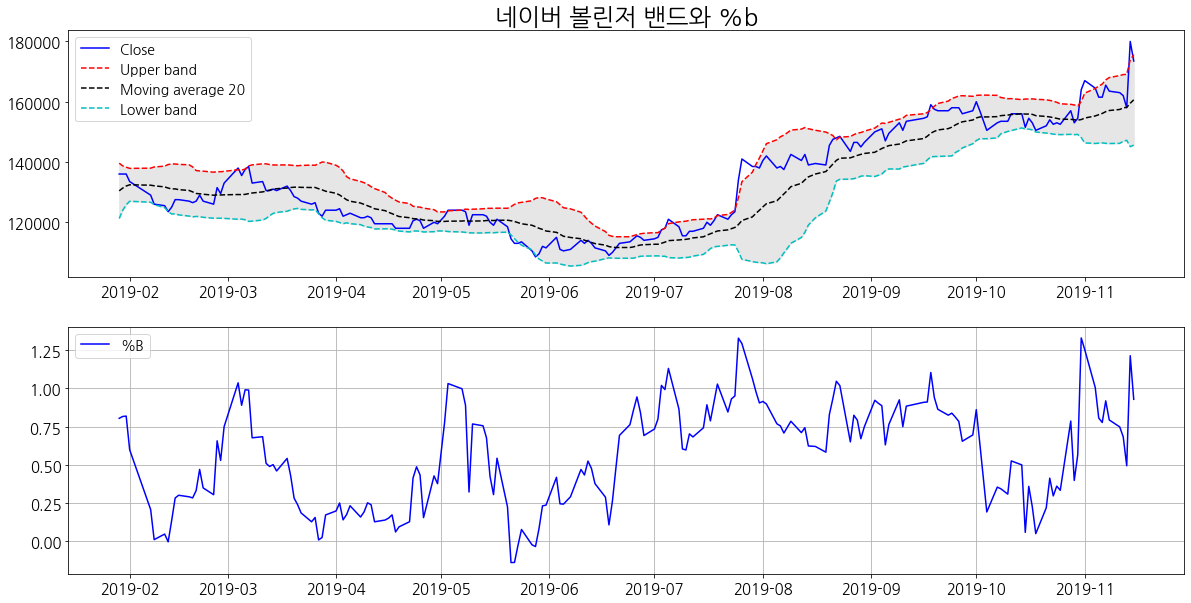

In [143]:
mk = Analyzer.MarketDB()
df = mk.get_daily_price('NAVER', '2019-01-02', '2019-11-15')
  
df['MA20'] = df['close'].rolling(window=20).mean() 
df['stddev'] = df['close'].rolling(window=20).std() 
df['upper'] = df['MA20'] + (df['stddev'] * 2)
df['lower'] = df['MA20'] - (df['stddev'] * 2)
# %b 칼럼 생성: (종가 - 하단밴드) / (상단밴드 - 하단 밴드)
df['PB'] = (df['close'] - df['lower']) / (df['upper'] - df['lower'])  
df = df[19:]

plt.rc('font', size=20)        
#plt.rc('axes', labelsize=10)   
plt.rc('xtick', labelsize=15)  
plt.rc('ytick', labelsize=15)  
plt.rc('legend', fontsize=14)  
plt.rc('figure', titlesize=50) 
plt.figure(figsize=(20,10))
plt.subplot(2, 1, 1)  # ②
plt.plot(df.index, df['close'], color='#0000ff', label='Close')
plt.plot(df.index, df['upper'], 'r--', label = 'Upper band')
plt.plot(df.index, df['MA20'], 'k--', label='Moving average 20')
plt.plot(df.index, df['lower'], 'c--', label = 'Lower band')
plt.fill_between(df.index, df['upper'], df['lower'], color='0.9')
plt.title('네이버 볼린저 밴드와 %b')
plt.legend(loc='best')

plt.subplot(2, 1, 2)  
plt.plot(df.index, df['PB'], color='b', label='%B')  
plt.grid(True)
plt.legend(loc='best')
#plt.show()
plt.savefig('네이버 볼린저 밴드와 %b')

#### 4.3.2 볼린저 밴드 지표 2 : 밴드폭 

밴드폭: 상단 볼린저 밴드와 하단 볼린저 밴드 사이의 폭 

$밴드폭 = {상단 볼린저 밴드 - 하단 볼린저 밴드 \over 중간 볼린저 밴드} $

- 밴드폭은 스퀴즈를 확인하는 데 유용한 지표 
- 스퀴즈: 변동성이 극히 낮은 수준까지 떨어져 곧이어 변동성 증가가 발생할 것으로 예상되는 상황 
- 밴드폭으로 강력한 추세의 시작과 마지막을 포착한다. 강력한 추세는 스퀴즈로부터 시작되는데 변동성이 커지면서 밴드폭 수치가 급격히 높아짐. -> 밴드 폭 넓어짐 -> 추세 반대의 밴드는 추제 반대 방향으로 향함. 
- 즉, 강한 상승 추세에서 하단 밴드가 아래로 향하는 모습을 띔. 

    

#### 네이버 볼린저 밴드와 밴드폭

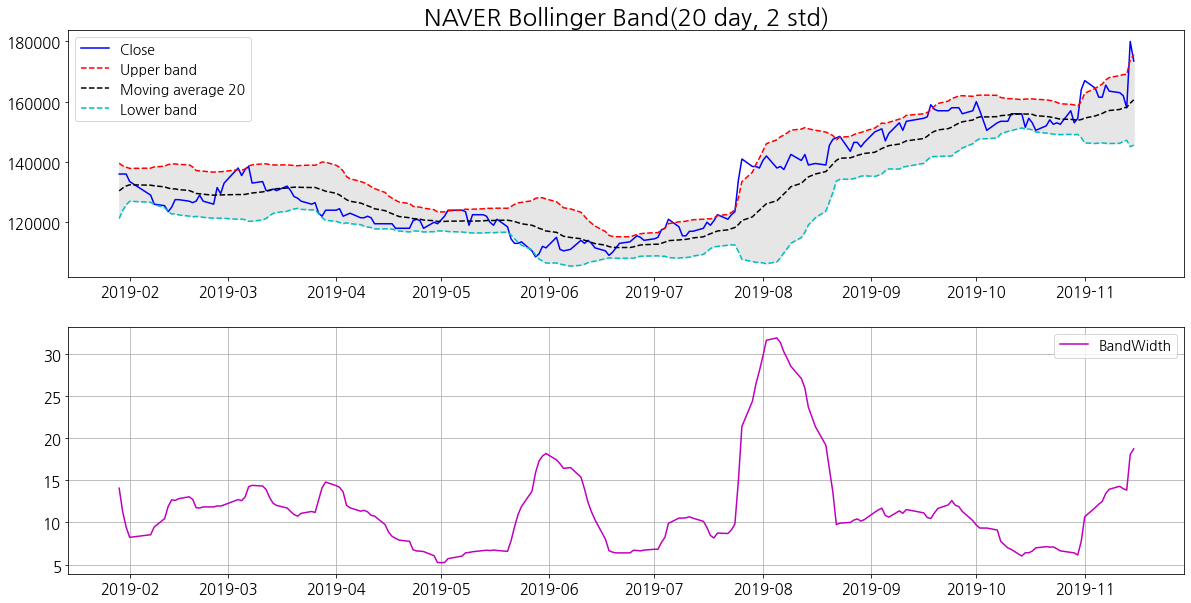

In [144]:
mk = Analyzer.MarketDB()
df = mk.get_daily_price('NAVER', '2019-01-02', '2019-11-15')
  
df['MA20'] = df['close'].rolling(window=20).mean() 
df['stddev'] = df['close'].rolling(window=20).std() 
df['upper'] = df['MA20'] + (df['stddev'] * 2)
df['lower'] = df['MA20'] - (df['stddev'] * 2)
# (상단 밴드-하단 밴드) / 중간 밴드 * 100 : bandwidth (밴드폭) 
df['bandwidth'] = (df['upper'] - df['lower']) / df['MA20'] * 100 
df = df[19:]

plt.rc('font', size=20)        
#plt.rc('axes', labelsize=10)   
plt.rc('xtick', labelsize=15)  
plt.rc('ytick', labelsize=15)  
plt.rc('legend', fontsize=14)  
plt.rc('figure', titlesize=50) 
plt.figure(figsize=(20,10))
plt.subplot(2, 1, 1)  
plt.plot(df.index, df['close'], color='#0000ff', label='Close')
plt.plot(df.index, df['upper'], 'r--', label = 'Upper band')
plt.plot(df.index, df['MA20'], 'k--', label='Moving average 20')
plt.plot(df.index, df['lower'], 'c--', label = 'Lower band')
plt.fill_between(df.index, df['upper'], df['lower'], color='0.9')
plt.title('NAVER Bollinger Band(20 day, 2 std)')
plt.legend(loc='best')

plt.subplot(2, 1, 2)  
# x좌표 df.index에 해당하는 bandwith값을 y좌표로 설정 
plt.plot(df.index, df['bandwidth'], color='m', label='BandWidth')
plt.grid(True)
plt.legend(loc='best')
#plt.show()
plt.savefig('네이버 볼린저 밴드와 밴드폭') 

### 4.4 볼린저 밴드 매매기법

#### 4.4.1 볼린저 밴드를 이용한 추세 추종 매매 기법 

C:\Users\mnch\AppData\Local\Temp\ipykernel_26636\2172606063.py:57: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  plt.savefig('NAVER 볼린저 밴드 추세 추종 매매기법')


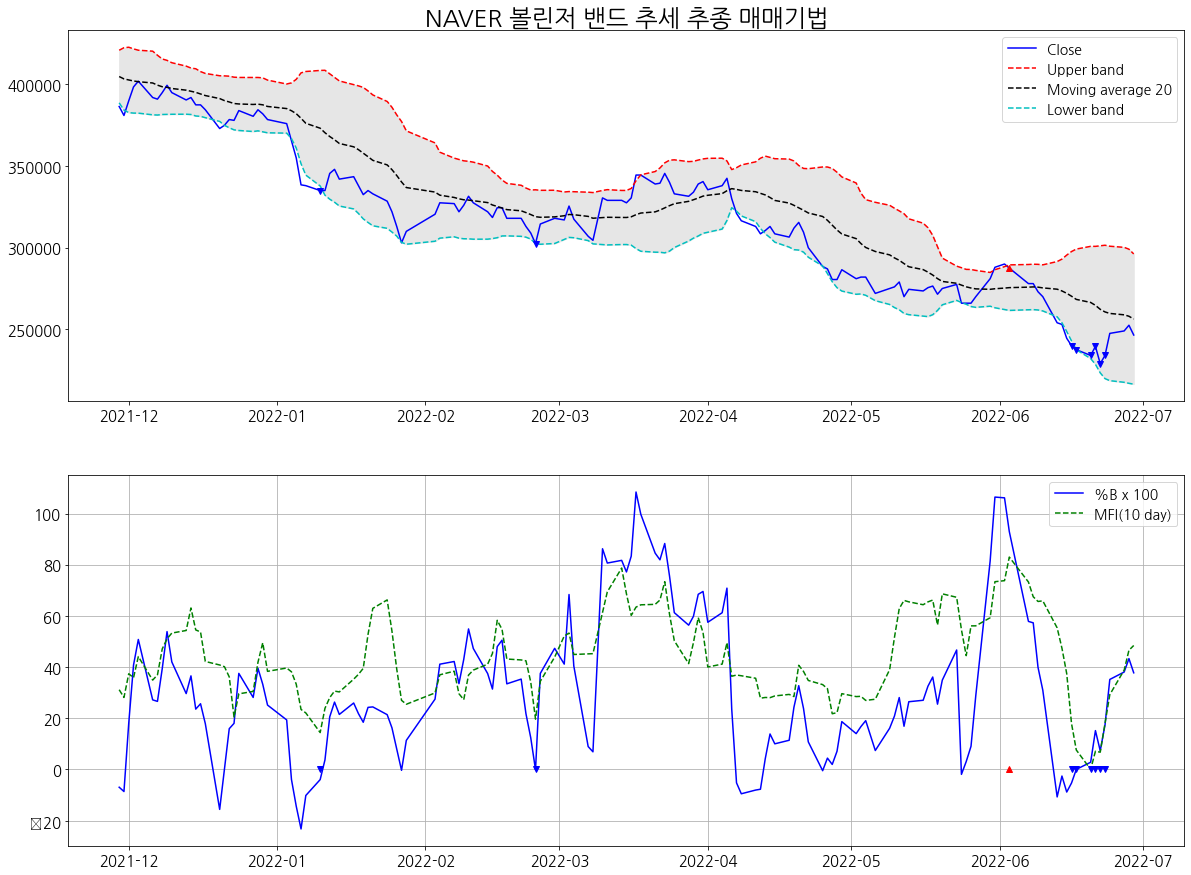

In [150]:
mk = Analyzer.MarketDB()
df = mk.get_daily_price('NAVER', '2021-11-02', '2022-06-29')
  
df['MA20'] = df['close'].rolling(window=20).mean() 
df['stddev'] = df['close'].rolling(window=20).std() 
df['upper'] = df['MA20'] + (df['stddev'] * 2)
df['lower'] = df['MA20'] - (df['stddev'] * 2)
df['PB'] = (df['close'] - df['lower']) / (df['upper'] - df['lower'])
df['TP'] = (df['high'] + df['low'] + df['close']) / 3
df['PMF'] = 0
df['NMF'] = 0
for i in range(len(df.close)-1):
    if df.TP.values[i] < df.TP.values[i+1]:
        df.PMF.values[i+1] = df.TP.values[i+1] * df.volume.values[i+1]
        df.NMF.values[i+1] = 0
    else:
        df.NMF.values[i+1] = df.TP.values[i+1] * df.volume.values[i+1]
        df.PMF.values[i+1] = 0
df['MFR'] = (df.PMF.rolling(window=10).sum() /
    df.NMF.rolling(window=10).sum())
df['MFI10'] = 100 - 100 / (1 + df['MFR'])
df = df[19:]

plt.rc('font', size=20)        
#plt.rc('axes', labelsize=10)   
plt.rc('xtick', labelsize=15)  
plt.rc('ytick', labelsize=15)  
plt.rc('legend', fontsize=14)  
plt.rc('figure', titlesize=50) 
plt.figure(figsize=(20,15))
plt.subplot(2, 1, 1)
plt.title('NAVER 볼린저 밴드 추세 추종 매매기법')
plt.plot(df.index, df['close'], color='#0000ff', label='Close')
plt.plot(df.index, df['upper'], 'r--', label ='Upper band')
plt.plot(df.index, df['MA20'], 'k--', label='Moving average 20')
plt.plot(df.index, df['lower'], 'c--', label ='Lower band')
plt.fill_between(df.index, df['upper'], df['lower'], color='0.9')
for i in range(len(df.close)):
    if df.PB.values[i] > 0.8 and df.MFI10.values[i] > 80:       # ①
        plt.plot(df.index.values[i], df.close.values[i], 'r^')  # ②
    elif df.PB.values[i] < 0.2 and df.MFI10.values[i] < 20:     # ③
        plt.plot(df.index.values[i], df.close.values[i], 'bv')  # ④
plt.legend(loc='best')

plt.subplot(2, 1, 2)
plt.plot(df.index, df['PB'] * 100, 'b', label='%B x 100')       # ⑤ 
plt.plot(df.index, df['MFI10'], 'g--', label='MFI(10 day)')     # ⑥
plt.yticks([-20, 0, 20, 40, 60, 80, 100, 120])                  # ⑦
for i in range(len(df.close)):
    if df.PB.values[i] > 0.8 and df.MFI10.values[i] > 80:
        plt.plot(df.index.values[i], 0, 'r^')
    elif df.PB.values[i] < 0.2 and df.MFI10.values[i] < 20:
        plt.plot(df.index.values[i], 0, 'bv')
plt.grid(True)
plt.legend(loc='best')
#plt.show();   
plt.savefig('NAVER 볼린저 밴드 추세 추종 매매기법') 

#### 6.4.2 볼린저 밴드를 이용한 반전 매매기법 

##### SK하이닉스 볼린전 밴드와 일중 강도율

C:\Users\mnch\AppData\Local\Temp\ipykernel_26636\949558881.py:40: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  plt.savefig('SK하이닉스 볼린저 밴드와 일중 강도율')


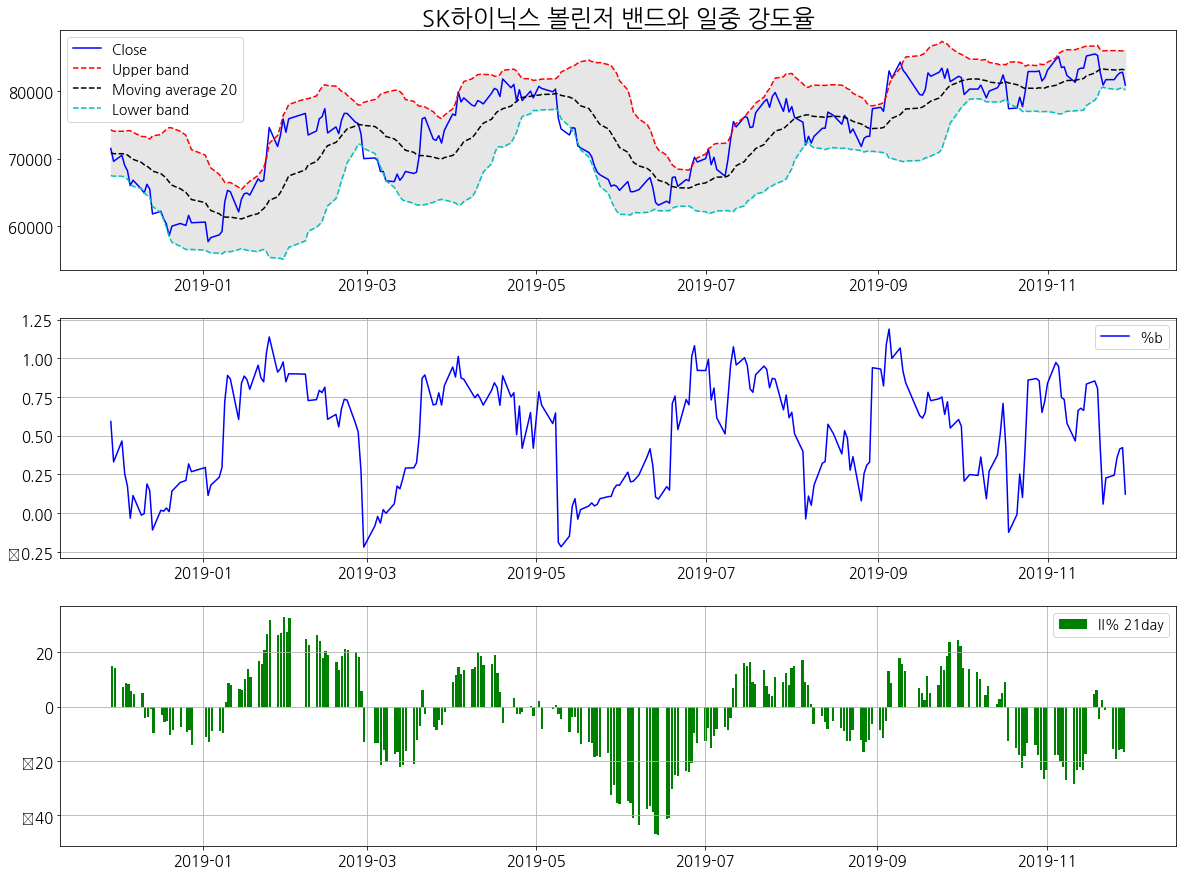

In [151]:
mk = Analyzer.MarketDB()
df = mk.get_daily_price('SK하이닉스', '2018-11-01', '2019-11-30')
  
df['MA20'] = df['close'].rolling(window=20).mean() 
df['stddev'] = df['close'].rolling(window=20).std() 
df['upper'] = df['MA20'] + (df['stddev'] * 2)
df['lower'] = df['MA20'] - (df['stddev'] * 2)
df['PB'] = (df['close'] - df['lower']) / (df['upper'] - df['lower'])

df['II'] = (2*df['close']-df['high']-df['low'])/(df['high']-df['low'])*df['volume']  # ①
df['IIP21'] = df['II'].rolling(window=21).sum()/df['volume'].rolling(window=21).sum()*100  # ②
df = df.dropna()

#plt.rc('axes', labelsize=10)   
plt.rc('xtick', labelsize=15)  
plt.rc('ytick', labelsize=15)  
plt.rc('legend', fontsize=14)  
plt.rc('figure', titlesize=50) 
plt.figure(figsize=(20,15))

plt.subplot(3, 1, 1)
plt.title('SK하이닉스 볼린저 밴드와 일중 강도율')
plt.plot(df.index, df['close'], 'b', label='Close')
plt.plot(df.index, df['upper'], 'r--', label ='Upper band')
plt.plot(df.index, df['MA20'], 'k--', label='Moving average 20')
plt.plot(df.index, df['lower'], 'c--', label ='Lower band')
plt.fill_between(df.index, df['upper'], df['lower'], color='0.9')

plt.legend(loc='best')
plt.subplot(3, 1, 2)
plt.plot(df.index, df['PB'], 'b', label='%b')
plt.grid(True)
plt.legend(loc='best')

plt.subplot(3, 1, 3)  # ③
plt.bar(df.index, df['IIP21'], color='g', label='II% 21day')  # ④
plt.grid(True)
plt.legend(loc='best')
#plt.show()
plt.savefig('SK하이닉스 볼린저 밴드와 일중 강도율') 

##### 볼린저 밴드 반전 매매 구현 

C:\Users\mnch\AppData\Local\Temp\ipykernel_26636\4252792246.py:50: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  plt.savefig('SK Hynix 볼린저 밴드 반전 매매 구현')


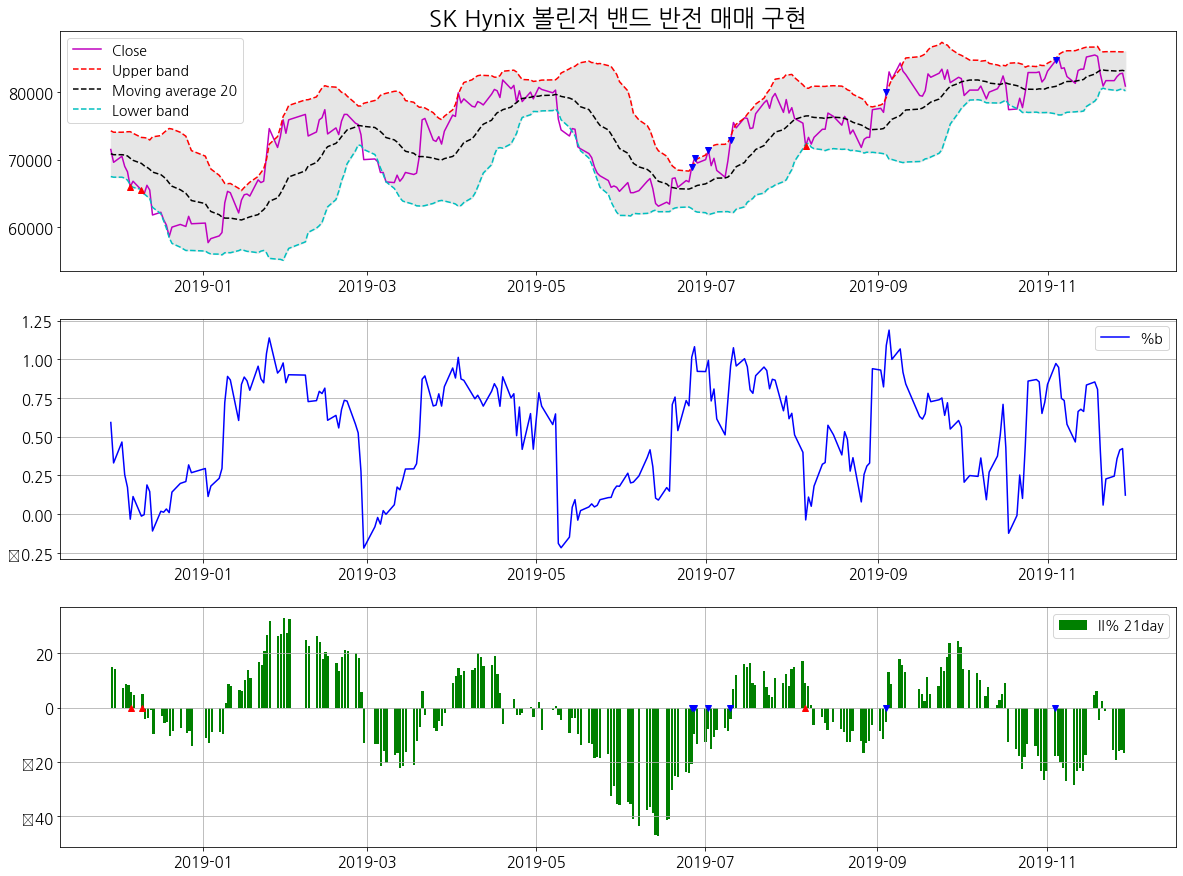

In [152]:
mk = Analyzer.MarketDB()
df = mk.get_daily_price('SK하이닉스', '2018-11-01', '2019-11-30')
  
df['MA20'] = df['close'].rolling(window=20).mean() 
df['stddev'] = df['close'].rolling(window=20).std() 
df['upper'] = df['MA20'] + (df['stddev'] * 2)
df['lower'] = df['MA20'] - (df['stddev'] * 2)
df['PB'] = (df['close'] - df['lower']) / (df['upper'] - df['lower'])

df['II'] = (2*df['close']-df['high']-df['low'])/(df['high']-df['low'])*df['volume']
df['IIP21'] = df['II'].rolling(window=21).sum()/df['volume'].rolling(window=21).sum()*100
df = df.dropna()

#plt.rc('axes', labelsize=10)   
plt.rc('xtick', labelsize=15)  
plt.rc('ytick', labelsize=15)  
plt.rc('legend', fontsize=14)  
plt.rc('figure', titlesize=50) 
plt.figure(figsize=(20,15))

plt.subplot(3, 1, 1)
plt.title('SK Hynix 볼린저 밴드 반전 매매 구현')
plt.plot(df.index, df['close'], 'm', label='Close')
plt.plot(df.index, df['upper'], 'r--', label ='Upper band')
plt.plot(df.index, df['MA20'], 'k--', label='Moving average 20')
plt.plot(df.index, df['lower'], 'c--', label ='Lower band')
plt.fill_between(df.index, df['upper'], df['lower'], color='0.9')
for i in range(0, len(df.close)):
    if df.PB.values[i] < 0.05 and df.IIP21.values[i] > 0:       # ①
        plt.plot(df.index.values[i], df.close.values[i], 'r^')  # ②
    elif df.PB.values[i] > 0.95 and df.IIP21.values[i] < 0:     # ③
        plt.plot(df.index.values[i], df.close.values[i], 'bv')  # ④
plt.legend(loc='best')

plt.subplot(3, 1, 2)
plt.plot(df.index, df['PB'], 'b', label='%b')
plt.grid(True)
plt.legend(loc='best')

plt.subplot(3, 1, 3)
plt.bar(df.index, df['IIP21'], color='g', label='II% 21day')
for i in range(0, len(df.close)):
    if df.PB.values[i] < 0.05 and df.IIP21.values[i] > 0:
        plt.plot(df.index.values[i], 0, 'r^') # ⑤
    elif df.PB.values[i] > 0.95 and df.IIP21.values[i] < 0:
        plt.plot(df.index.values[i], 0, 'bv') # ⑥
plt.grid(True)
plt.legend(loc='best')
#plt.show()
plt.savefig('SK Hynix 볼린저 밴드 반전 매매 구현') 